<a href="https://colab.research.google.com/github/jhonatanalfred7/ScriptPythonML/blob/main/RegresionLogistica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib.pyplot as plt 
#plt.rc("font", size=14)  #Change the font size on a matplotlib plot

import seaborn as sns
#sns.set(style="white") #white background style for seaborn plots
#sns.set(style="whitegrid", color_codes=True)

import warnings
#warnings.simplefilter(action='ignore')

In [3]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv(r'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv')
# Read CSV test data file into DataFrame
test_df = pd.read_csv(r'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/test.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 11)
(418, 10)


In [5]:
train_df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [6]:
train_df['age'].isnull().sum()/train_df.shape[0]* 100

19.865319865319865

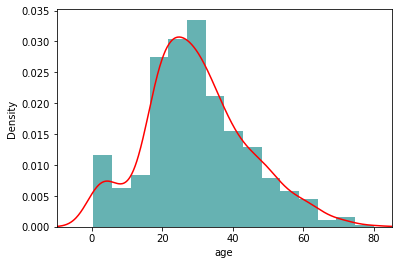

In [7]:
# #bins:   n = number of observations = 100
         # Range = maximum value – minimum value = 91 – 1 = 90
         # of intervals =  √n = √100 = 10
         # Width of intervals =  Range / (# of intervals) = 90/10 = 9
                               
ax = train_df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["age"].plot(kind='density', color='red')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

In [8]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [9]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [10]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: embarked, dtype: int64


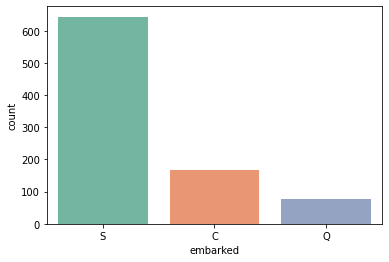

In [11]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['embarked'].value_counts())
#s.value_counts(dropna=False)
sns.countplot(x='embarked', data=train_df, palette='Set2')
plt.show()

In [12]:
print('The most common boarding port of embarkation is %s.' %train_df['embarked'].value_counts().idxmax())


The most common boarding port of embarkation is S.


2.4. Ajustes finales a los datos (entrenamiento y prueba)
Según mi evaluación de los valores faltantes en el conjunto de datos, haré los siguientes cambios en los datos:



*   Si falta "Edad" para una fila determinada, lo imputaré con 28 (edad media).
*   Si "Embarked" falta para una fila dividida, lo imputaré con "S" (el puerto de embarque más común).
*   Ignoraré "Cabin" como variable. Hay demasiados valores perdidos para la imputación. Según la información disponible, parece que este valor está asociado con la clase del pasajero y la tarifa pagada.

In [13]:
train_data = train_df.copy()
train_data["age"].fillna(train_df["age"].median(skipna=True), inplace=True)
train_data["embarked"].fillna(train_df['embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('cabin', axis=1, inplace=True)
print(train_data.isnull().sum())
print(train_data.head())

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64
   survived  pclass  ...     fare embarked
0         0       3  ...   7.2500        S
1         1       1  ...  71.2833        C
2         1       3  ...   7.9250        S
3         1       1  ...  53.1000        S
4         0       3  ...   8.0500        S

[5 rows x 10 columns]


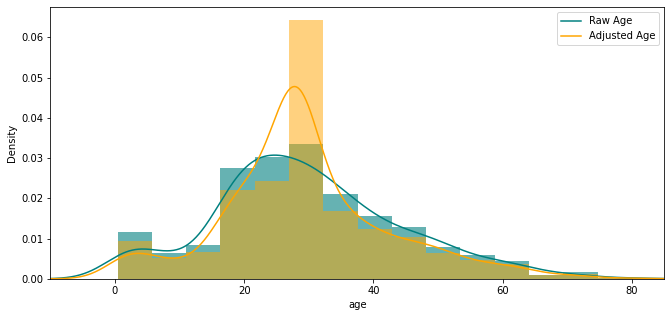

In [14]:
plt.figure(figsize=(11,5)) #15,8
ax = train_df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["age"].plot(kind='density', color='teal')

ax = train_data["age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["age"].plot(kind='density', color='orange')

ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

Según el diccionario de datos de Kaggle, tanto SibSp como Parch se relacionan con viajar con la familia. En aras de la simplicidad (y para tener en cuenta la posible multicolinealidad), combinaré el efecto de estas variables en un predictor categórico: si ese individuo viajaba solo o no.

In [15]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["sibsp"]+train_data["parch"])>0, 0, 1)
train_data.drop('sibsp', axis=1, inplace=True)
train_data.drop('parch', axis=1, inplace=True)

In [16]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["pclass","embarked","sex"])
#training.drop('Sex_female', axis=1, inplace=True)
#training.drop('PassengerId', axis=1, inplace=True)
#training.drop('Name', axis=1, inplace=True)
#training.drop('Ticket', axis=1, inplace=True)
training.drop(['sex_female','name','ticket'],axis = 1,inplace = True)
final_train = training
final_train.head(1)

,survived,age,fare,TravelAlone,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_male
0,0,22.0,7.25,0,0,0,1,0,0,1,1


**Ahora, aplique los mismos cambios a los datos de prueba.**

Solicitaré la misma imputación de "Edad" en los datos de la prueba que hice para mis datos de entrenamiento (si faltan, Edad = 28).
También eliminaré la variable "Cabina" de los datos de prueba, ya que he decidido no incluirla en mi análisis.
No faltaban valores en la variable de puerto "Embarked".
Agregaré las variables ficticias para finalizar el conjunto de prueba.
Finalmente, imputaré el valor 1 faltante de "Tarifa" con la mediana, 14,45.

In [17]:
test_df.isnull().sum()

pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64

In [18]:
test_data = test_df.copy()
test_data["age"].fillna(train_df["age"].median(skipna=True), inplace=True)
test_data["fare"].fillna(train_df["fare"].median(skipna=True), inplace=True)
test_data.drop('cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["sibsp"]+test_data["parch"])>0, 0, 1)
test_data.drop(['sibsp','parch'], axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["pclass","embarked","sex"])
testing.drop(['sex_female','name','ticket'], axis=1, inplace=True)

final_test = testing
final_test.head()

,age,fare,TravelAlone,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# **3. Exploratory Data Analysis**


## **3.1. Exploration of Age**

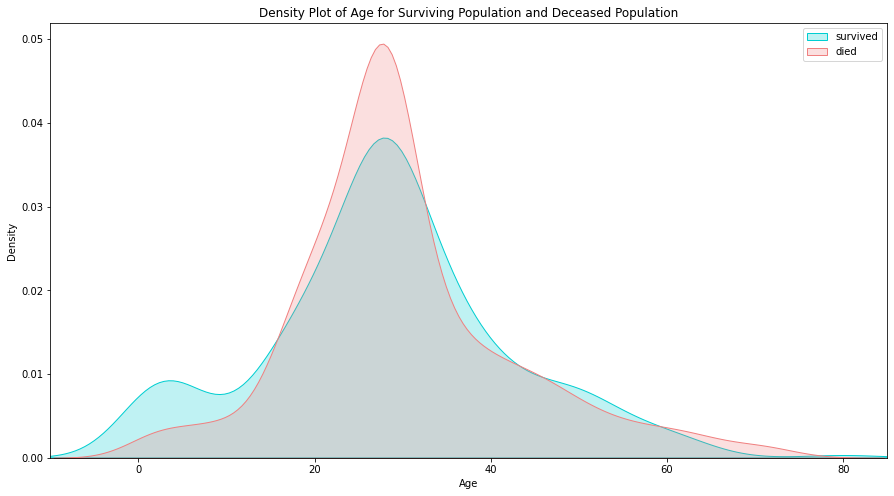

In [19]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(final_train["age"][final_train.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["age"][final_train.survived == 0], color="lightcoral", shade=True)

plt.legend(['survived', 'died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')

ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

La distribución por edades de supervivientes y fallecidos es en realidad muy similar. Una diferencia notable es que, de los supervivientes, una mayor proporción eran niños. Evidentemente, los pasajeros intentaron salvar a los niños dándoles un lugar en las balsas salvavidas.

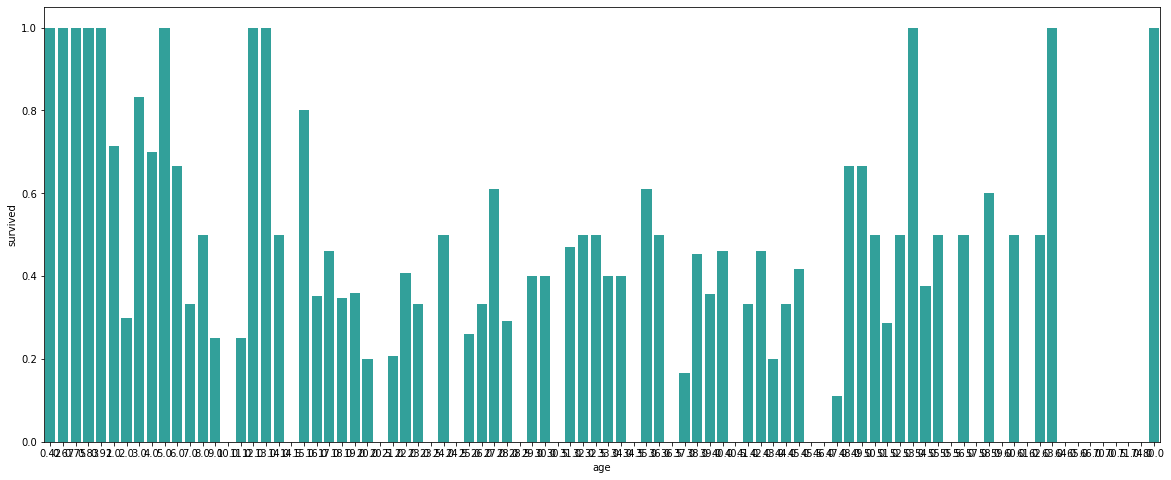

In [20]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["age", "survived"]].groupby(['age'], as_index=False).mean()
g = sns.barplot(x='age', y='survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [21]:
final_train['IsMinor']=np.where(final_train['age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['age']<=16, 1, 0)

## **3.2. Exploration of Fare**

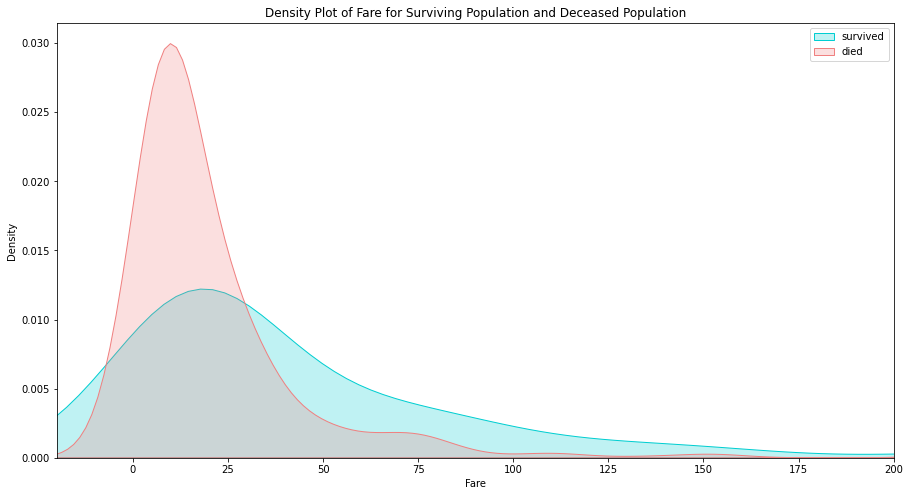

In [22]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(final_train["fare"][final_train.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["fare"][final_train.survived == 0], color="lightcoral", shade=True)
plt.legend(['survived', 'died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

Como las distribuciones son claramente diferentes para las tarifas de los sobrevivientes frente a las de los fallecidos, es probable que esto sea un predictor significativo en nuestro modelo final. Los pasajeros que pagaron una tarifa más baja parecen haber tenido menos probabilidades de sobrevivir. Esto probablemente esté fuertemente correlacionado con la Clase de Pasajero, que veremos a continuación.

## **3.3. Exploration of Passenger Class**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


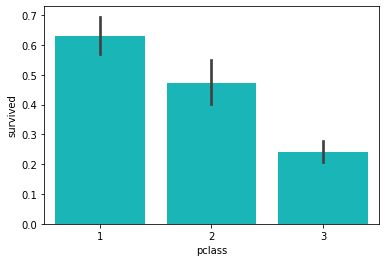

In [23]:
sns.barplot('pclass', 'survived', data=train_df, color="darkturquoise")
plt.show()

## **3.4. Exploration of Embarked Port**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


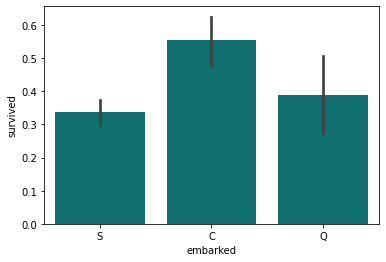

In [24]:
sns.barplot('embarked', 'survived', data=train_df, color="teal")
plt.show()

**3.5. Exploration of Traveling Alone vs. With Family**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


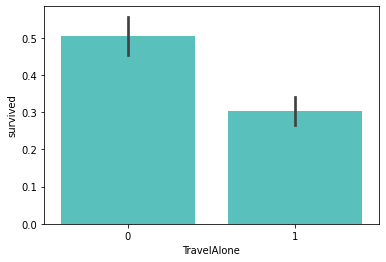

In [25]:
sns.barplot('TravelAlone', 'survived', data=final_train, color="mediumturquoise")
plt.show()

**3.6. Exploration of Gender Variable**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


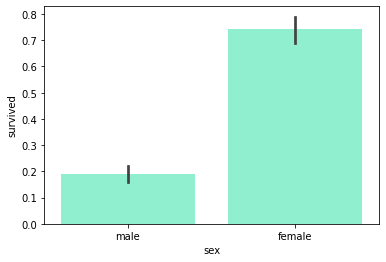

In [26]:
sns.barplot('sex', 'survived', data=train_df, color="aquamarine")
plt.show()

# **4. Logistic Regression and Results**

## **4.1. Feature selection**

### **4.1.1. Recursive feature elimination**

Dado un estimador externo que asigna pesos a las características, la eliminación de características recursivas (RFE) consiste en seleccionar características considerando de forma recursiva conjuntos de características cada vez más pequeños. Primero, el estimador se entrena en el conjunto inicial de características y la importancia de cada característica se obtiene a través de un **coef_ attribute** o mediante un atributo **feature_importances_**. Luego, las características menos importantes se eliminan del conjunto actual de características. Ese procedimiento se repite de forma recursiva en el conjunto eliminado hasta que finalmente se alcanza el número deseado de características para seleccionar.

Referencias:
http://scikit-learn.org/stable/modules/feature_selection.html

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["age","fare","TravelAlone","pclass_1","pclass_2","embarked_C","embarked_S","sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['survived']
# Build a logreg and compute the feature importances
model = LogisticRegression(max_iter=400)

# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))


Selected features: ['age', 'TravelAlone', 'pclass_1', 'pclass_2', 'embarked_C', 'embarked_S', 'sex_male', 'IsMinor']


### **4.1.2. Feature ranking with recursive feature elimination and cross-validation**

RFECV realiza RFE en un ciclo de validación cruzada para encontrar el número óptimo o el mejor número de características. De aquí en adelante, una eliminación de características recursivas aplicada en regresión logística con ajuste automático del número de características seleccionadas con validación cruzada.

Optimal number of features: 9
Selected features: ['age', 'fare', 'TravelAlone', 'pclass_1', 'pclass_2', 'embarked_C', 'embarked_S', 'sex_male', 'IsMinor']


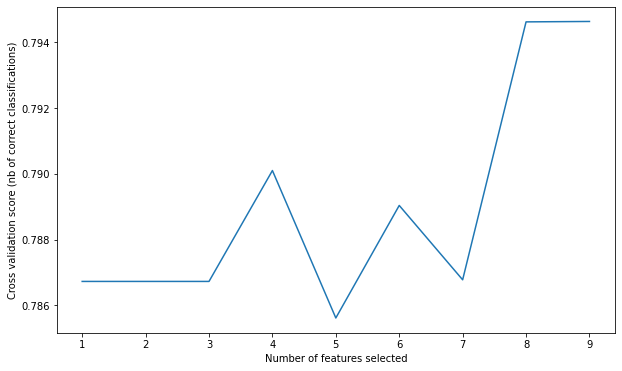

In [50]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(max_iter = 400), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

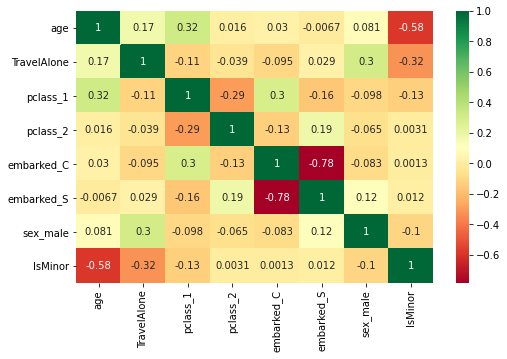

In [51]:
Selected_features = ['age', 'TravelAlone', 'pclass_1', 'pclass_2', 'embarked_C', 
                     'embarked_S', 'sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## **4.2. Review of model evaluation procedures**

Motivación: necesita una forma de elegir entre modelos de aprendizaje automático

El objetivo es estimar el rendimiento probable de un modelo con datos fuera de la muestra.
Idea inicial: entrenar y probar con los mismos datos

Pero, maximizar la precisión del entrenamiento recompensa los modelos demasiado complejos que se ajustan a los datos de entrenamiento.
Idea alternativa: Split de entrenamiento / prueba

Divida el conjunto de datos en dos partes, de modo que el modelo se pueda entrenar y probar con diferentes datos
La precisión de las pruebas es una mejor estimación que la precisión del entrenamiento del rendimiento fuera de la muestra
Problema con la división de tren / prueba
Proporciona una estimación de alta varianza, ya que cambiar las observaciones que se encuentran en el conjunto de pruebas puede cambiar significativamente la precisión de las pruebas.
La precisión de las pruebas puede cambiar mucho según la observación que se encuentre en el conjunto de pruebas.
Referencia:
http://www.ritchieng.com/machine-learning-cross-validation/

### **4.2.1. Model evaluation based on simple train/test split using train_test_split() function**


Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.838


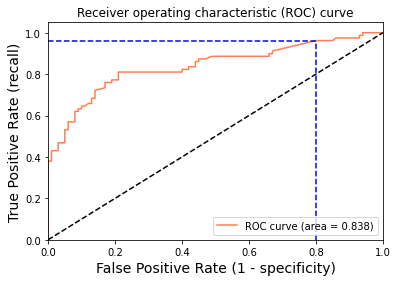

Using a threshold of 0.070 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### **4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function**

In [58]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression(max_iter = 1000)
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.796
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


### **4.2.3. Model evaluation based on K-fold cross-validation using cross_validate() function**

In [60]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression(max_iter = 400)

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/-0.024)
LogisticRegression average log_loss: 0.454 (+/-0.037)
LogisticRegression average auc: 0.850 (+/-0.028)


In [62]:
cols = ["age","fare","TravelAlone","pclass_1","pclass_2","embarked_C","embarked_S","sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression(max_iter = 400)

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.795 (+/-0.027)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


## **4.3. GridSearchCV evaluating using multiple scorers simultaneously**

best params: LogisticRegression(C=2.4000100000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=600, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 2.4000100000000004}
best score: 0.8069662921348316


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


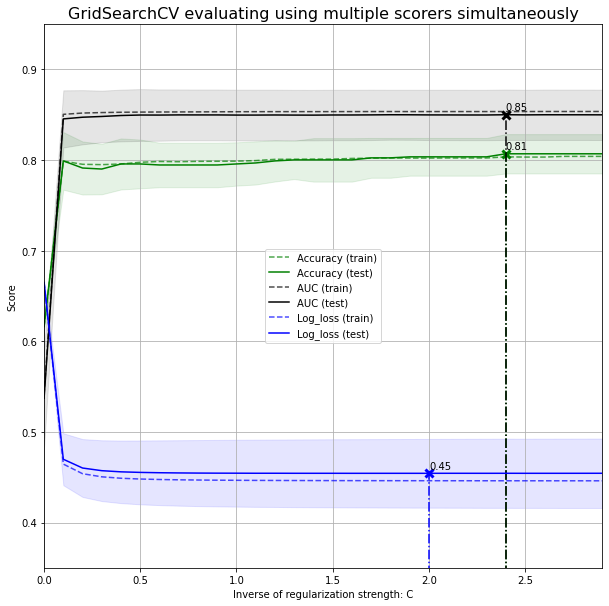

In [65]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(max_iter = 600), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

## **4.4. GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously**

Podemos aplicar muchas tareas juntas para una evaluación más profunda, como la búsqueda de cuadrículas, utilizando la validación cruzada basada en k-pliegues repetidos muchas veces, que se pueden escalar o no con respecto a muchos anotadores y ajustar el parámetro para un estimador dado.

best params: Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=False, with_std=False)),
                ('clf',
                 LogisticRegression(C=4.20001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=400,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
best params: {'clf__C': 4.20001}
best score: 0.7993258426966291


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


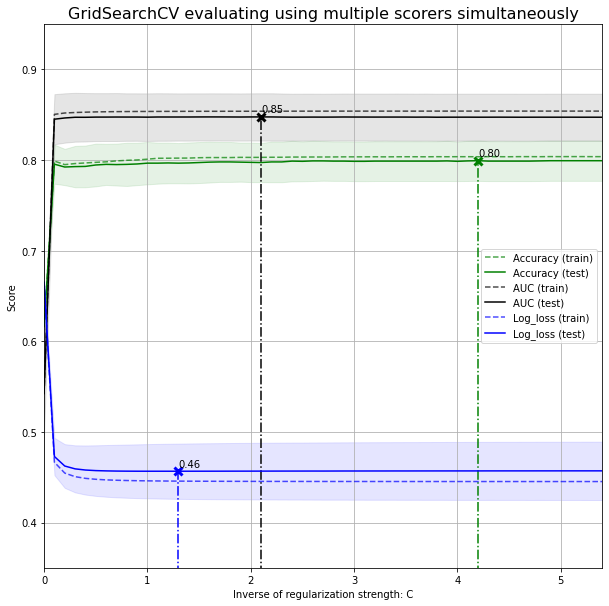

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression(max_iter = 400)

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
final_test['survived'] = log_clf.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

In [68]:
final_test.columns

Index(['age', 'fare', 'TravelAlone', 'pclass_1', 'pclass_2', 'pclass_3',
       'embarked_C', 'embarked_Q', 'embarked_S', 'sex_male', 'IsMinor'],
      dtype='object')

In [29]:
print(final_train.head())
print(final_test.head())

   survived   age     fare  ...  embarked_S  sex_male  IsMinor
0         0  22.0   7.2500  ...           1         1        0
1         1  38.0  71.2833  ...           0         0        0
2         1  26.0   7.9250  ...           1         0        0
3         1  35.0  53.1000  ...           1         0        0
4         0  35.0   8.0500  ...           1         1        0

[5 rows x 12 columns]
    age     fare  TravelAlone  ...  embarked_S  sex_male  IsMinor
0  34.5   7.8292            1  ...           0         1        0
1  47.0   7.0000            0  ...           1         0        0
2  62.0   9.6875            1  ...           0         1        0
3  27.0   8.6625            1  ...           1         1        0
4  22.0  12.2875            0  ...           1         0        0

[5 rows x 11 columns]


In [27]:
final_train.loc[final_train.survived == 1,'fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: fare, Length: 342, dtype: float64